<a href="https://colab.research.google.com/github/balajisivakumar/stratogrid/blob/main/BERT_play_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip uninstall torch torchvision timm fastai -y
!pip uninstall torch torchvision torchaudio -y


Found existing installation: torch 2.5.1
Uninstalling torch-2.5.1:
  Successfully uninstalled torch-2.5.1
Found existing installation: torchvision 0.20.1
Uninstalling torchvision-0.20.1:
  Successfully uninstalled torchvision-0.20.1
Found existing installation: timm 1.0.15
Uninstalling timm-1.0.15:
  Successfully uninstalled timm-1.0.15
Found existing installation: fastai 2.7.18
Uninstalling fastai-2.7.18:
  Successfully uninstalled fastai-2.7.18
Found existing installation: torchaudio 2.6.0
Uninstalling torchaudio-2.6.0:
  Successfully uninstalled torchaudio-2.6.0


In [7]:
!pip uninstall torch torchvision timm fastai -y
!pip install torch==2.6.0 torchvision==0.17.0 torchaudio==2.6.0 --no-cache-dir
!pip install timm fastai
!pip install transformers scikit-learn numpy scipy matplotlib
!pip install minisom
!pip install sentence-transformers --no-cache-dir


INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==2.6.0 and torchvision==0.17.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==2.6.0
    torchvision 0.17.0 depends on torch==2.2.0

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
  Using cached timm-1.0.15-py3-none-any.whl.metadata (52 kB)
  Using cached fastai-2.7.18-py3-none-any.whl.metadata (9.1 kB)
  Using cached torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with oth

^C
^C
^C


In [1]:
import torch
import torchvision
import timm
import fastai
import transformers

print("All required packages are installed successfully!")


All required packages are installed successfully!


In [5]:
#EXTRACT BERT EMBEDDINGS and STORE it in PICKLE FILE Tick_Sense_with_BERT.pkl for future processing

import pandas as pd
import numpy as np
import torch
import pickle
from transformers import BertTokenizer, BertModel

# Load dataset
file_path = "/content/sample_data/Tickets_500.csv"  # Ensure correct file path
df = pd.read_csv(file_path)

# Ensure 'Issue' and 'Comments' columns exist
if 'Issue' not in df.columns or 'Comments' not in df.columns:
    raise ValueError("Columns 'Issue' and 'Comments' are required but not found in the dataset")

# Combine 'Issue' and 'Comments' into a single 'Context' column
df["Context"] = df["Issue"].astype(str) + " " + df["Comments"].astype(str)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Function to extract BERT embeddings
def get_bert_embedding(text):
    tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():  # Correct syntax
        output = model(**tokens)
    return output.last_hidden_state[:, 0, :].squeeze().numpy()  # Extract the [CLS] token embedding

# Apply embedding extraction to each row
df["BERT_Embedding"] = df["Context"].apply(get_bert_embedding)

# Convert embeddings to NumPy arrays for efficiency
df["BERT_Embedding"] = df["BERT_Embedding"].apply(lambda x: np.array(x))

# Save embeddings as a pickle file for future use
pickle_file = "Tick_Sense_with_BERT.pkl"
with open(pickle_file, "wb") as f:
    pickle.dump(df[["TicketID", "Context", "BERT_Embedding"]].to_dict(orient="records"), f)

# Save the dataset with embeddings as CSV for readability
csv_file = "Tick_Sense_with_BERT.csv"
df.to_csv(csv_file, index=False)

# Display a sample of the dataset
print(df[["TicketID", "Context", "BERT_Embedding"]].head())

print(f"✅ Embeddings saved to {pickle_file} and {csv_file}")


  TicketID                                            Context  \
0  TKT-001  API integration issue with digital workflow Un...   
1  TKT-002  Application error causing load time delays Res...   
2  TKT-003  Order fulfillment system glitch Resolved succe...   
3  TKT-004  Production scheduling conflict due to maintena...   
4  TKT-005  Report generation delay in financial software ...   

                                      BERT_Embedding  
0  [-0.43294117, -0.111464374, -0.29116976, 0.001...  
1  [-0.670982, -0.23809151, -0.29706144, -0.08609...  
2  [-0.74749, -0.2602301, -0.27658617, 0.06448695...  
3  [-0.7614497, -0.3289273, -0.27589008, -0.11410...  
4  [-0.84584004, -0.33351955, -0.2173282, 0.09212...  
✅ Embeddings saved to Tick_Sense_with_BERT.pkl and Tick_Sense_with_BERT.csv


In [30]:
#If BERT throws Torch error use this - all-MiniLM-L6-v2 BERT model and STORE it in PICKLE FILE Tick_Sense_with_BERT.pkl for future processing

import pandas as pd
import numpy as np
import pickle
from sentence_transformers import SentenceTransformer

# Load dataset (make sure this path is correct!)
file_path = "/content/sample_data/Tickets_500.csv"
df = pd.read_csv(file_path)

# Combine 'Issue' and 'Comments' to create a context column
df["Context"] = df["Issue"].astype(str) + " " + df["Comments"].astype(str)

# Load a lightweight, high-performance BERT-based model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Function to extract embeddings
def get_bert_embedding(text):
    return model.encode(text)

# Apply embedding extraction to each row
df["BERT_Embedding"] = df["Context"].apply(get_bert_embedding)

# Convert embeddings to NumPy arrays (helps with performance)
df["BERT_Embedding"] = df["BERT_Embedding"].apply(lambda x: np.array(x))

# Save the dataset with embeddings (for future awesomeness)
df.to_pickle("Tick_Sense_with_BERT.pkl")

# Save a CSV version for reference
df.to_csv("Tick_Sense_with_BERT.csv", index=False)

# Show a sample to confirm everything looks good
print(df[["TicketID", "Issue", "Context", "BERT_Embedding"]].head())


  TicketID                                              Issue  \
0  TKT-001        API integration issue with digital workflow   
1  TKT-002         Application error causing load time delays   
2  TKT-003                    Order fulfillment system glitch   
3  TKT-004  Production scheduling conflict due to maintenance   
4  TKT-005      Report generation delay in financial software   

                                             Context  \
0  API integration issue with digital workflow Un...   
1  Application error causing load time delays Res...   
2  Order fulfillment system glitch Resolved succe...   
3  Production scheduling conflict due to maintena...   
4  Report generation delay in financial software ...   

                                      BERT_Embedding  
0  [-0.113638945, 0.051870923, -0.024474343, -0.0...  
1  [-0.034618832, 0.041503116, 0.01629688, 0.0063...  
2  [-0.012676158, -0.016483018, 0.076198876, -0.0...  
3  [-0.074870996, 0.014423682, 0.09605885, 0.0420...

In Here DataFrame columns: ['TicketID', 'DateCreated', 'TicketType', 'SubmittedBy', 'InvolvedRole', 'Issue', 'Priority', 'Status', 'Comments', 'RelatedStrategicGoals', 'Context', 'BERT_Embedding']
✅ Successfully converted BERT embeddings!
Epoch 0/10 - Learning Rate: 0.499950, Sigma: 9.999000
Epoch 1/10 - Learning Rate: 0.499900, Sigma: 9.998000
Epoch 2/10 - Learning Rate: 0.499850, Sigma: 9.997000
Epoch 3/10 - Learning Rate: 0.499800, Sigma: 9.996001
Epoch 4/10 - Learning Rate: 0.499750, Sigma: 9.995001
Epoch 5/10 - Learning Rate: 0.499700, Sigma: 9.994001
Epoch 6/10 - Learning Rate: 0.499650, Sigma: 9.993002
Epoch 7/10 - Learning Rate: 0.499600, Sigma: 9.992003
Epoch 8/10 - Learning Rate: 0.499550, Sigma: 9.991004
Epoch 9/10 - Learning Rate: 0.499500, Sigma: 9.990004
Epoch 0/10 - Learning Rate: 0.049995, Sigma: 1.999800
Epoch 1/10 - Learning Rate: 0.049990, Sigma: 1.999600
Epoch 2/10 - Learning Rate: 0.049985, Sigma: 1.999400
Epoch 3/10 - Learning Rate: 0.049980, Sigma: 1.999200
Epoch

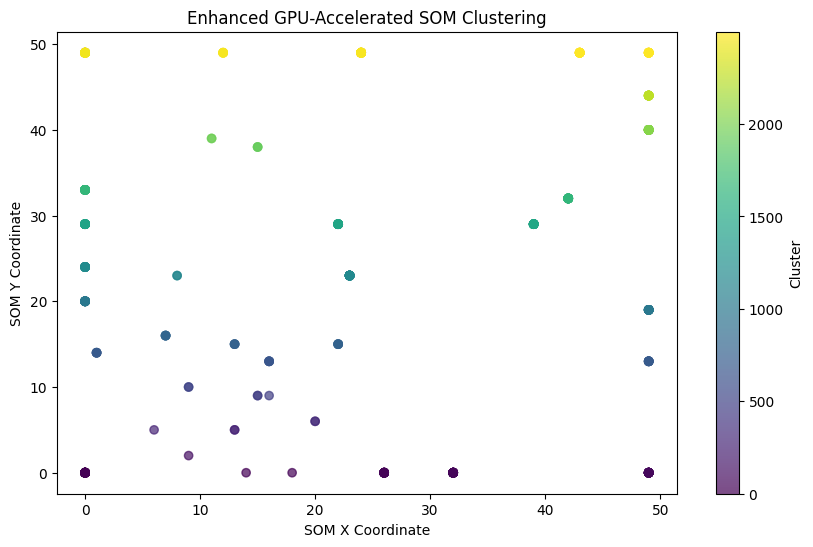

✅ SOM model moved to CPU. Model is now on: cpu
✅ Extended Training Completed! Data saved as CSV '/content/PySOM_Clustered_Tickets_10_10.csv'
✅ Extended Training Completed! Data saved as PKL '/content/PySOM_Clustered_Tickets_10_10.pkl'


In [31]:

import pandas as pd
import numpy as np
import torch
import torch.nn as nn  # ✅ Import added
import matplotlib.pyplot as plt
import pickle

# ✅ Step 1: Load Dataset with BERT Embeddings
file_path = "/content/Tick_Sense_with_BERT.pkl"
df = pd.read_pickle(file_path)
# Convert list to DataFrame
df = pd.DataFrame(df)
print("In Here DataFrame columns:", df.columns.tolist())
# Verify it is now a DataFrame
#print(type(df))  # Should print <class 'pandas.core.frame.DataFrame'>
#print(df.head())  # Display the first few rows

if "BERT_Embedding" not in df.columns:
    raise ValueError("🚨 Column 'BERT_Embedding' not found in the dataset!")


def convert_to_numpy(x):
    if isinstance(x, np.ndarray):
        return x
    elif isinstance(x, list):
        return np.array(x)
    elif isinstance(x, str):
        return np.array(ast.literal_eval(x))  # Convert string representation of list to NumPy array
    else:
        raise TypeError(f"Unexpected data type in BERT_Embedding: {type(x)}")

df["BERT_Embedding"] = df["BERT_Embedding"].apply(convert_to_numpy)

# Stack embeddings into a single NumPy array
embeddings = np.vstack(df["BERT_Embedding"].values)

print("✅ Successfully converted BERT embeddings!")
# Ensure embeddings are NumPy arrays
df["BERT_Embedding"] = df["BERT_Embedding"].apply(lambda x: np.array(x))
embeddings = np.vstack(df["BERT_Embedding"].values)

# ✅ Step 2: Define PyTorch-Based SOM Model
class SOM(nn.Module):
    def __init__(self, x_dim, y_dim, input_dim):
        super(SOM, self).__init__()
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.weights = nn.Parameter(torch.randn(x_dim * y_dim, input_dim))

        # Create the grid locations and register as a buffer
        locs = torch.stack(torch.meshgrid(
            torch.arange(x_dim), torch.arange(y_dim), indexing="ij"
        )).reshape(2, -1).T.float()
        self.register_buffer("locations", locs)

    def forward(self, x):
        # Compute pairwise distances between x and self.weights
        distances = torch.cdist(x.unsqueeze(0), self.weights.unsqueeze(0)).squeeze(0)
        return distances.argmin(dim=1)  # Best Matching Unit (BMU) index

    def update_weights(self, x, bmu_index, lr, sigma):
        bmu_index = bmu_index.view(-1)
        bmu_location = self.locations[bmu_index]

        # Compute distance between each SOM node and the BMU
        distances = torch.norm(self.locations.unsqueeze(1) - bmu_location.unsqueeze(0), dim=2)
        h = torch.exp(-distances**2 / (2 * sigma**2))

        # Compute weight updates
        diff = x.unsqueeze(0) - self.weights.unsqueeze(1)
        update = (h.unsqueeze(2).expand_as(diff) * diff).sum(dim=1)
        normalization = h.sum(dim=1, keepdim=True)

        self.weights.data += lr * update / (normalization + 1e-8)  # Small epsilon to prevent division by zero


# ✅ Step 3: Train SOM on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = embeddings.shape[1]
som_size = 50  # 50x50 SOM Grid
som = SOM(som_size, som_size, input_dim).to(device)

# Convert data to PyTorch tensor and move to GPU if available
data = torch.tensor(embeddings, dtype=torch.float32).to(device)

# Training Parameters
num_epochs_phase1 = 10  # Coarse Phase (Reduced for efficiency)
num_epochs_phase2 = 10  # Fine-Tuning Phase
lr_decay = 0.9999  # Gradual decay factor

def train_som(som, data, epochs, lr_init, sigma_init):
    lr = lr_init
    sigma = sigma_init
    for epoch in range(epochs):
        bmu_index = som(data)
        som.update_weights(data, bmu_index, lr, sigma)
        lr *= lr_decay
        sigma *= lr_decay

        if epoch % (epochs // 10) == 0:
            print(f"Epoch {epoch}/{epochs} - Learning Rate: {lr:.6f}, Sigma: {sigma:.6f}")

# 🔹 **Phase 1: Coarse Training** (Establishes global structures)
train_som(som, data, num_epochs_phase1, lr_init=0.5, sigma_init=10.0)

# 🔹 **Phase 2: Fine-Tuning** (Refines local adjustments)
train_som(som, data, num_epochs_phase2, lr_init=0.05, sigma_init=2.0)

# ✅ Step 4: Assign Clusters Using SOM
bmu_index = som(data).cpu().numpy()
df["SOM_Cluster"] = bmu_index

# ✅ Ensure all original columns are kept before saving
output_df = df.copy()  # Keep all columns (Issue, Comments, etc.)

# ✅ Step 5: Save Clustered Data
output_csv_path = f"/content/PySOM_Clustered_Tickets_{num_epochs_phase1}_{num_epochs_phase2}.csv"
output_pickle_path = f"/content/PySOM_Clustered_Tickets_{num_epochs_phase1}_{num_epochs_phase2}.pkl"

df.to_csv(output_csv_path, index=False)

df.to_pickle(output_pickle_path)
print(f"Pickle file saved as '{output_pickle_path}'")
# ✅ Step 6: Visualize SOM Clustering
plt.figure(figsize=(10, 6))
plt.scatter(bmu_index % som_size, bmu_index // som_size, c=bmu_index, cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.xlabel("SOM X Coordinate")
plt.ylabel("SOM Y Coordinate")
plt.title("Enhanced GPU-Accelerated SOM Clustering")
plt.show()

# ✅ Move SOM model to CPU after training
som.to("cpu")
data = data.cpu()  # Move dataset back to CPU if needed
print(f"✅ SOM model moved to CPU. Model is now on: {next(som.parameters()).device}")

print(f"✅ Extended Training Completed! Data saved as CSV '{output_csv_path}'")
print(f"✅ Extended Training Completed! Data saved as PKL '{output_pickle_path}'")



In [32]:
print("DataFrame Columns:", df.columns.tolist())


DataFrame Columns: ['TicketID', 'DateCreated', 'TicketType', 'SubmittedBy', 'InvolvedRole', 'Issue', 'Priority', 'Status', 'Comments', 'RelatedStrategicGoals', 'Context', 'BERT_Embedding', 'SOM_Cluster']


In [37]:
# LABELING USING HBDSCAN AND TF_IDF on TOP of it
import os
import pandas as pd
import numpy as np
import hdbscan
from sklearn.feature_extraction.text import TfidfVectorizer

##############################################################################
# 1. Specify the input pickle file
##############################################################################
input_pickle_path = "/content/PySOM_Clustered_Tickets_10_10.pkl"

# Derive base name without extension, e.g. "PySOM_Clustered_Tickets_10_10"
base_name = os.path.splitext(os.path.basename(input_pickle_path))[0]

# Construct output file names based on the base name
output_csv_path = f"/content/{base_name}_Label.csv"
output_pickle_path = f"/content/{base_name}_Label.pkl"

##############################################################################
# 2. Load the data from the pickle (assumes "BERT_Embedding" and "Context")
##############################################################################
df = pd.read_pickle(input_pickle_path)

def parse_embedding(x):
    """Convert a string-based embedding into a NumPy array, if needed."""
    if isinstance(x, str):
        parts = x.strip("[]").split()
        return np.array([float(val) for val in parts])
    return np.array(x)

# Apply conversion if necessary
df["BERT_Embedding_Parsed"] = df["BERT_Embedding"].apply(parse_embedding)

##############################################################################
# 3. Create a matrix of embeddings of shape (N, 768)
##############################################################################
embeddings = np.vstack(df["BERT_Embedding_Parsed"].values)

##############################################################################
# 4. Run HDBSCAN on the embedding matrix
##############################################################################
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)  # Adjust parameters as needed
hdbscan_labels = clusterer.fit_predict(embeddings)
df["HDBSCAN_Cluster"] = hdbscan_labels

##############################################################################
# 5. For each HDBSCAN cluster, compute top words using TF-IDF on the "Context"
##############################################################################
cluster_tf_idf_labels = {}
unique_clusters = np.unique(hdbscan_labels)

for cluster in unique_clusters:
    # Documents in this cluster
    doc_indices = np.where(hdbscan_labels == cluster)[0]
    texts = df.iloc[doc_indices]["Context"].tolist()
    if not texts:
        continue

    # TF-IDF
    vectorizer = TfidfVectorizer(stop_words="english", max_features=50)
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Sum TF-IDF scores across all docs in cluster
    word_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()

    # Sort words by descending TF-IDF
    words_with_scores = sorted(zip(vocab, word_scores), key=lambda x: x[1], reverse=True)

    # Pick the top 5 words
    top_words = [word for word, score in words_with_scores[:5]]
    cluster_tf_idf_labels[cluster] = ", ".join(top_words)

df["HDBSCAN_Label"] = df["HDBSCAN_Cluster"].map(cluster_tf_idf_labels)
df["Top_Term"] = df["HDBSCAN_Label"].apply(lambda x: x.split(",")[0] if isinstance(x, str) and x else "No Label")


##############################################################################
# 6. Save the updated DataFrame with the derived filenames
##############################################################################
df.to_csv(output_csv_path, index=False)
print(f"CSV file saved as '{output_csv_path}'")

df.to_pickle(output_pickle_path)
print(f"Pickle file saved as '{output_pickle_path}'")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CSV file saved as '/content/PySOM_Clustered_Tickets_10_10_Label.csv'
Pickle file saved as '/content/PySOM_Clustered_Tickets_10_10_Label.pkl'


In [38]:
print("DataFrame Columns:", df.columns.tolist())

DataFrame Columns: ['TicketID', 'DateCreated', 'TicketType', 'SubmittedBy', 'InvolvedRole', 'Issue', 'Priority', 'Status', 'Comments', 'RelatedStrategicGoals', 'Context', 'BERT_Embedding', 'SOM_Cluster', 'BERT_Embedding_Parsed', 'HDBSCAN_Cluster', 'HDBSCAN_Label', 'Top_Term']


In [45]:
#SQUARE POLYGON
import json

##############################################################################
# Section 2.4: Geometric Transformations
##############################################################################

# 1) Create a square polygon for each SOM node in a 50x50 grid
def square_polygon(r, c):
    """
    Return the corners of a 1x1 square for the node at row=r, col=c.
    Coordinates are [x, y].
    We'll keep row as the y-axis and column as the x-axis for consistency.
    """
    return [
        [c,     r    ],
        [c + 1, r    ],
        [c + 1, r + 1],
        [c,     r + 1],
        [c,     r    ]  # repeat the first corner to close the polygon
    ]

features = []
for r in range(som_size):
    for c in range(som_size):
        node_id = r * som_size + c  # flatten (r, c) if you like
        polygon_coords = square_polygon(r, c)

        feature = {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [polygon_coords]  # a single ring
            },
            "properties": {
                "node_id": node_id,
                "row": r,
                "col": c
                # (Optional) Add custom properties, e.g. top words
            }
        }
        features.append(feature)

geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

with open("som_nodes.geojson", "w") as f:
    json.dump(geojson_data, f, indent=2)
print("✅ Created 'som_nodes.geojson' with 2,500 square polygons (50x50)!")


# 2) Create a point feature for each ticket at or near its BMU center
ticket_features = []
for i, row in df.iterrows():
    node_id = row["SOM_Cluster"]
    r = node_id // som_size  # Convert node_id back to (row, col)
    c = node_id % som_size

    x_center = c + 0.5  # Center of the square
    y_center = r + 0.5

    # Convert row to dictionary while ensuring all values are JSON serializable
    properties = {}
    for col, value in row.items():
        if col == "BERT_Embedding_Parsed":  # ❌ Exclude BERT_Embedding_Parsed
            continue
        if col == "BERT_Embedding":  # ❌ Exclude BERT_Embedding_Parsed
            continue
        if isinstance(value, np.ndarray):  # Convert NumPy arrays to lists
            properties[col] = value.tolist()
        else:
            properties[col] = value  # Keep other values unchanged

    properties["SOM_Cluster"] = int(node_id)  # Ensure SOM_Cluster is an int

    # Build a GeoJSON point
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [x_center, y_center]
        },
        "properties": properties  # Attach all row data except BERT_Embedding
    }
    ticket_features.append(feature)

# Create GeoJSON object
tickets_geojson = {
    "type": "FeatureCollection",
    "features": ticket_features
}

# Save to file
output_geojson_path = "som_tickets.geojson"
with open(output_geojson_path, "w") as f:
    json.dump(tickets_geojson, f, indent=2)

print(f"✅ Created '{output_geojson_path}' with all columns except 'BERT_Embedding'!")



✅ Created 'som_nodes.geojson' with 2,500 square polygons (50x50)!
✅ Created 'som_tickets.geojson' with all columns except 'BERT_Embedding'!


In [46]:
# HEXAGON
import json
import numpy as np
import pandas as pd

# SOM Grid Size
som_size = 50  # 50x50 SOM Grid
hex_radius = 1  # Controls hexagon size

# Function to create a hexagon centered at (cx, cy)
def hexagon_polygon(cx, cy, radius=1):
    """Returns hexagon coordinates centered at (cx, cy)."""
    angle_deg = np.arange(0, 360, 60)  # 6 points
    angle_rad = np.deg2rad(angle_deg)
    return [[cx + radius * np.cos(a), cy + radius * np.sin(a)] for a in angle_rad] + [[cx + radius * np.cos(0), cy + radius * np.sin(0)]]  # Close the hexagon

# Create hexagon GeoJSON features
features = []
for r in range(som_size):
    for c in range(som_size):
        node_id = r * som_size + c  # Flatten (r, c) for node ID
        cx = c * 1.5  # X center shift for hexagonal grid
        cy = r * np.sqrt(3)  # Y center shift
        polygon_coords = hexagon_polygon(cx, cy, hex_radius)

        feature = {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [polygon_coords]  # Hexagon as a polygon
            },
            "properties": {
                "node_id": node_id,
                "row": r,
                "col": c
            }
        }
        features.append(feature)

# Export to GeoJSON
hex_geojson = {
    "type": "FeatureCollection",
    "features": features
}
with open("som_nodes_hex.geojson", "w") as f:
    json.dump(hex_geojson, f, indent=2)

print("✅ Created 'som_nodes_hex.geojson' with 2,500 hexagons (50x50)!")


✅ Created 'som_nodes_hex.geojson' with 2,500 hexagons (50x50)!


In [58]:
# Load SOM-clustered dataset
df = pd.read_pickle("/content/PySOM_Clustered_Tickets_10_10_Label.pkl")

# Place documents at hexagon centers
ticket_features = []
for i, row in df.iterrows():
    node_id = row["SOM_Cluster"]
    r = node_id // som_size  # Convert node_id back to (row, col)
    c = node_id % som_size

    cx = c * 1.5  # X coordinate shift for hexagons
    cy = r * np.sqrt(3)  # Y coordinate shift

    # Convert row to dictionary but exclude 'BERT_Embedding'
    properties = {col: row[col] for col in df.columns if col != "BERT_Embedding"}
    properties["SOM_Cluster"] = int(node_id)  # Ensure integer cluster

    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [cx, cy]
        },
        "properties": properties
    }
    ticket_features.append(feature)

# Export ticket points to GeoJSON
tickets_geojson = {
    "type": "FeatureCollection",
    "features": ticket_features
}
with open("som_tickets_hex.geojson", "w") as f:
    json.dump(tickets_geojson, f, indent=2)

print("✅ Created 'som_tickets_hex.geojson' with document points!")


TypeError: Object of type ndarray is not JSON serializable

In [52]:
!pip install pydeck


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.8 MB/s eta 0:00:00


In [55]:
import pydeck as pdk
import json
import pandas as pd
import numpy as np

# Load hexagons (SOM nodes)
hexagons = "som_nodes_hex.geojson"  # GeoJSON file with SOM hexagons
tickets = "som_tickets.geojson"  # GeoJSON file with ticket points

# Load document points for visualization (Assuming lat/lon)
df_tickets = pd.read_json(tickets)
df_tickets = pd.DataFrame(df_tickets["features"].apply(lambda x: x["properties"]))  # Extract properties

# Add a column for dynamic elevation & color based on cluster density
df_tickets["color_weight"] = np.random.uniform(0, 10, len(df_tickets))  # Random color intensity
df_tickets["elevation_weight"] = np.random.uniform(0, 10, len(df_tickets))  # Random elevation

# Define color range
custom_color_range = [
    [173, 216, 230, 100],  # Light Blue
    [0, 191, 255, 150],    # Deep Sky Blue
    [30, 144, 255, 200],   # Dodger Blue
    [0, 0, 255, 255]       # Pure Blue
]

# Define Map View
view_state = pdk.ViewState(
    latitude=25,
    longitude=25,
    zoom=3,
    pitch=40,
    bearing=25
)

# Create Hexagon Layer for SOM Nodes
hex_layer = pdk.Layer(
    "GeoJsonLayer",
    hexagons,
    opacity=0.6,
    stroked=True,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation=1,  # Will be animated
    get_fill_color=[200, 30, 30, 50]  # Semi-transparent red
)

# Create Ticket Points Layer
points_layer = pdk.Layer(
    "GeoJsonLayer",
    tickets,
    opacity=0.8,
    stroked=True,
    filled=True,
    pickable=True,
    get_fill_color=[0, 0, 200, 150],  # Blue dots
    get_radius=10  # Adjust point size
)

# Create Hexagon Layer for Animated Elevation
animated_hex_layer = pdk.Layer(
    "HexagonLayer",
    df_tickets,
    get_position=["SOM_Cluster", "SOM_Cluster"],
    radius=5000,
    extruded=True,
    coverage=1,
    auto_highlight=True,
    pickable=True,
    get_color_weight="color_weight",
    color_aggregation="SUM",
    color_range=custom_color_range,
    get_elevation_weight="elevation_weight",
    elevation_aggregation="SUM",
    elevation_scale=4,  # Animated
)

# Create Deck
deck = pdk.Deck(
    layers=[hex_layer, points_layer, animated_hex_layer],
    initial_view_state=view_state,
    tooltip={"text": "Elevation: {elevationValue} \n Color Weight: {colorValue}"},
)

# Export to HTML
html_file = "animated_hexagon_map_with_controls.html"
deck.to_html(html_file, notebook_display=False)

# Inject JavaScript for animation controls
js_code = """
<script>
    let elevationScale = 2;
    let increasing = true;
    let animationSpeed = 0.5;
    let animationRunning = true;

    function animateElevation() {
        if (!animationRunning) return;

        const layers = deckgl.props.layers;
        const hexLayer = layers[2]; // Animated Hex Layer

        if (increasing) {
            elevationScale += animationSpeed;
            if (elevationScale > 20) increasing = false;
        } else {
            elevationScale -= animationSpeed;
            if (elevationScale < 2) increasing = true;
        }

        hexLayer.props.elevationScale = elevationScale;
        deckgl.setProps({ layers: [layers[0], layers[1], hexLayer] });

        requestAnimationFrame(animateElevation);
    }

    function startAnimation() {
        animationRunning = true;
        requestAnimationFrame(animateElevation);
    }

    function stopAnimation() {
        animationRunning = false;
    }

    function changeSpeed(value) {
        animationSpeed = parseFloat(value);
    }

    document.addEventListener("DOMContentLoaded", function() {
        const controlsDiv = document.createElement("div");
        controlsDiv.innerHTML = `
            <div style="position: fixed; top: 10px; left: 10px; background: white; padding: 10px; border-radius: 5px; z-index: 1000;">
                <button onclick="startAnimation()">Start</button>
                <button onclick="stopAnimation()">Pause</button>
                <label>Speed:</label>
                <input type="range" min="0.1" max="2" step="0.1" value="0.5" onchange="changeSpeed(this.value)">
            </div>
        `;
        document.body.appendChild(controlsDiv);

        requestAnimationFrame(animateElevation);
    });
</script>
"""

# Inject JavaScript animation into the generated HTML file
with open(html_file, "r", encoding="utf-8") as f:
    html_content = f.read()

# Append the JavaScript animation code at the end of the HTML body
html_content = html_content.replace("</body>", js_code + "\n</body>")

# Save the updated HTML file with animation and controls
with open(html_file, "w", encoding="utf-8") as f:
    f.write(html_content)

print(f"✅ Animated Hexagon Map saved as '{html_file}'. Open it in a browser.")

# Show the map in Jupyter Notebook
deck.show()


<IPython.core.display.Javascript object>

✅ Animated Hexagon Map saved as 'animated_hexagon_map_with_controls.html'. Open it in a browser.


<IPython.core.display.Javascript object>